# I. Iris

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
train_data=pd.read_csv('Iris.csv')
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
train_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
train_data.isnull().sum() # Kiểm tra giá tri thiếu
train_data = train_data.dropna()  # Loại bỏ dòng thiếu

## Mã hóa dữ liệu

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_data['Species'] = encoder.fit_transform(train_data['Species'])
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


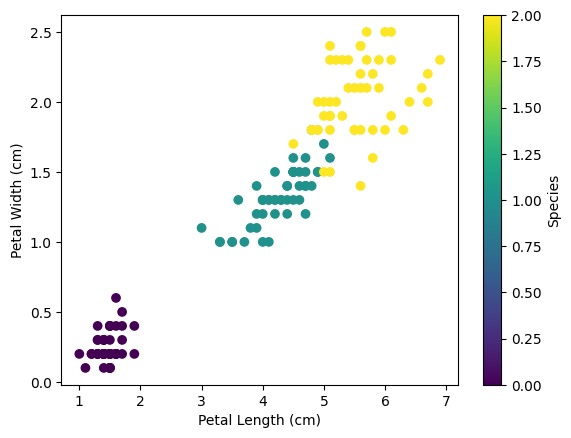

In [45]:
plt.scatter(train_data['PetalLengthCm'], train_data['PetalWidthCm'], c=train_data['Species'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.colorbar(label='Species')
plt.show()

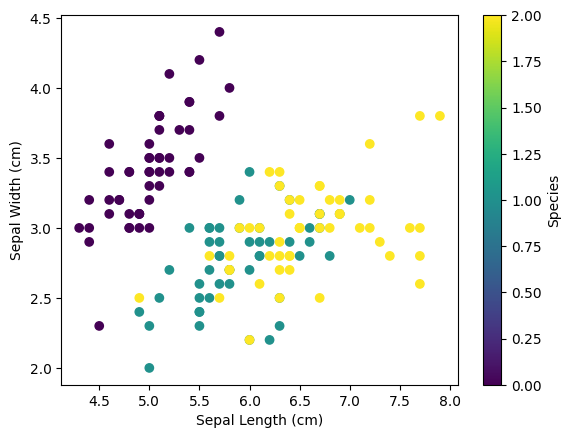

In [46]:
plt.scatter(train_data['SepalLengthCm'], train_data['SepalWidthCm'], c=train_data['Species'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Species')
plt.show()

## Chọn đặc trưng mới

In [47]:
train_data['SepalArea'] = train_data['SepalLengthCm'] * train_data['SepalWidthCm']
train_data['PetalArea'] = train_data['PetalLengthCm'] * train_data['PetalWidthCm']
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea
0,1,5.1,3.5,1.4,0.2,0,17.85,0.28
1,2,4.9,3.0,1.4,0.2,0,14.70,0.28
2,3,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5,5.0,3.6,1.4,0.2,0,18.00,0.28


## Chọn đặc trưng phù hợp

In [48]:
X = train_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','PetalArea']]
y = train_data['Species']
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalArea
0,5.1,3.5,1.4,0.2,0.28
1,4.9,3.0,1.4,0.2,0.28
2,4.7,3.2,1.3,0.2,0.26
3,4.6,3.1,1.5,0.2,0.30
4,5.0,3.6,1.4,0.2,0.28
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,11.96
146,6.3,2.5,5.0,1.9,9.50
147,6.5,3.0,5.2,2.0,10.40
148,6.2,3.4,5.4,2.3,12.42


## Chuẩn hóa dữ liệu

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# chuẩn hóa dữ liệu về thang đo có trung bình =0 và độ lệch chuẩn bằng 1 theo công thức: X_scale=(X-mean)/std
print(X_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00
  -1.17782349e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00
  -1.16930880e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00
  -1.08841920e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00
  -1.14376472e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00
  -1.16930880e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00
  -1.17356615e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00
  -1.20123890e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00
  -1.16930880e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00

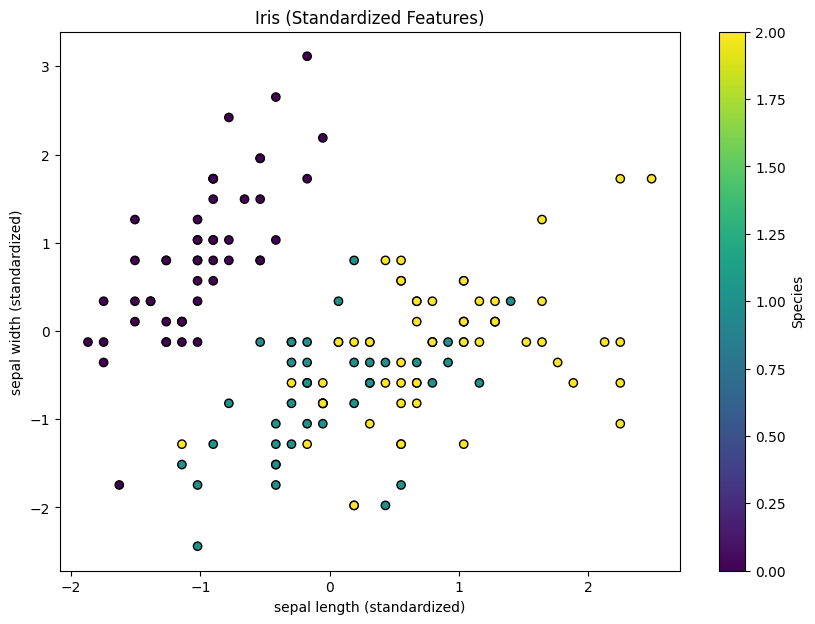

In [50]:
# Giả sử X_scaled là dữ liệu đã chuẩn hóa, y là nhãn species
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_scaled[:, 0],  # sepal length (chuẩn hóa)
    X_scaled[:, 1],  # sepal width (chuẩn hóa)
    c=y, cmap='viridis', edgecolor='k'
)
plt.xlabel('sepal length (standardized)')
plt.ylabel('sepal width (standardized)')
plt.title('Iris (Standardized Features)')
plt.colorbar(scatter, label='Species')
plt.show()


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.5, random_state=5
)

## Huấn luyện Logistic Regression

In [93]:
model = LogisticRegression()
a=model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Đánh giá mô hình

In [94]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9466666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.93      0.93      0.93        29
           2       0.92      0.92      0.92        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [95]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average="weighted"))
print("Recall   :", recall_score(y_test, y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test, y_pred,average="weighted"))

Accuracy : 0.9466666666666667
Precision: 0.9466666666666667
Recall   : 0.9466666666666667
F1 Score : 0.9466666666666667


## Huấn luyện Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model1= DecisionTreeClassifier(random_state=0)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("Độ chính xác (accuracy):", metrics.accuracy_score(y_test, y_pred))
print("Báo cáo phân loại:\n", metrics.classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", metrics.confusion_matrix(y_test, y_pred))

Độ chính xác (accuracy): 0.9466666666666667
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.96      0.90      0.93        29
           2       0.88      0.96      0.92        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Ma trận nhầm lẫn:
 [[22  0  0]
 [ 0 26  3]
 [ 0  1 23]]


In [97]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average="weighted"))
print("Recall   :", recall_score(y_test, y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test, y_pred,average="weighted"))

Accuracy : 0.9466666666666667
Precision: 0.948755935422602
Recall   : 0.9466666666666667
F1 Score : 0.9467809523809524


## Huấn luyện KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Độ chính xác (accuracy):", metrics.accuracy_score(y_test, y_pred))
print("Báo cáo phân loại:\n", metrics.classification_report(y_test, y_pred))
print("Ma trận nhầm lẫn:\n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average="weighted"))
print("Recall   :", recall_score(y_test, y_pred,average="weighted"))
print("F1 Score :", f1_score(y_test, y_pred,average="weighted"))

Độ chính xác (accuracy): 0.9466666666666667
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.93      0.93      0.93        29
           2       0.92      0.92      0.92        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Ma trận nhầm lẫn:
 [[22  0  0]
 [ 0 27  2]
 [ 0  2 22]]
Accuracy : 0.9466666666666667
Precision: 0.9466666666666667
Recall   : 0.9466666666666667
F1 Score : 0.9466666666666667
